In [3]:
import numpy as np 
import nmrfuncs
import sys, os
from scipy.io import savemat, loadmat
import cirq
from timeit import default_timer as timer
import importlib

In [7]:
importlib.reload(nmrfuncs)
num_qubits = 4
nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
spinach_datapath = '/Users/kis/Dropbox/NMR Learning/Code/matlab/spectrumSim/fid_data/'
path = "evolution_circuits/acetonitrile/zf_ion/"
# npoints = 4096
npoints = 100
t_ind_List = np.array([i for i in range(npoints)]).astype(float)
# t_ind_List = np.arange(0,4096,0.5,dtype=float)
gamma_1H = 2.6752 * 1e8; gamma_13C = 0.6728 * 1e8
weights = np.array([gamma_1H, gamma_1H, gamma_1H, gamma_13C]) / gamma_1H
repetitions = 1000; p1q = 0.001; p2q = 0.02

start = timer()

fid_raw = nmrfuncs.ZULF_noiselessSim(t_ind_List, path, nmr_reg, weights)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion.mat'.format(npoints), {'fid_raw_zf_qalg': fid_raw}, oned_as='column')
print(fid_raw)

# fid_raw = nmrfuncs.ZULF_snSim(t_ind_List, path, nmr_reg, weights, repetitions)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_sn_{:d}.mat'.format(npoints,repetitions), {'fid_raw_zf_qalg': fid_raw}, oned_as='column')

# fid_raw = nmrfuncs.ZULF_decohSim(t_ind_List, path, nmr_reg, weights, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_depol1q_{:.3f}_depol2q_{:.3f}.mat'.format(npoints,p1q,p2q), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# fid_raw = nmrfuncs.ZULF_decohSim_fill(t_ind_List, path, nmr_reg, weights, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_depol1q_{:.3f}_depol2q_{:.3f}_fill.mat'.format(npoints,p1q,p2q), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# p = 0.005
# fid_raw = nmrfuncs.ZULF_dampSim(t_ind_List, path, nmr_reg, weights, p)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_amplitudedamp_{:.3f}.mat'.format(npoints,p), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# fid_raw = nmrfuncs.ZULF_noisySim(t_ind_List, path, nmr_reg, weights, repetitions, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_sn_{:d}_depol1q_{:.3f}_depol2q_{:.3f}.mat'.format(npoints,repetitions,p1q,p2q), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# M = 256
# t_ind_List_NUS_zf = np.loadtxt('../matlab/spectrumSim/zulf_masks/sampleMask_N_4096_M_{:d}_stretchFac_0.5'.format(M), dtype=float).astype(int)
# t_ind_List_NUS_ulf = np.loadtxt('../matlab/spectrumSim/zulf_masks/sampleMask_N_4096_M_{:d}_stretchFac_0.5'.format(M), dtype=float).astype(int)
# fid_raw = nmrfuncs.ZULF_noisySim_MC(t_ind_List_NUS_zf, path, nmr_reg, weights, repetitions, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_sn_{:d}_depol1q_{:.3f}_depol2q_{:.3f}_NUS_{:d}.mat'.format(npoints,repetitions,p1q,p2q,M), {'fid_raw_zf_qalg_NUS': fid_raw}, oned_as='column')

print(timer()-start)

[0.7658124608310821, 0.6664673802264628, 0.667903981105358, 0.6784711315090106, 0.6543578065449238, 0.7637923731323779, 0.6835345278933483, 0.657060544286178, 0.6865925076882234, 0.6448801265181945, 0.7544649083246877, 0.704789758558668, 0.6465580153955928, 0.6940128521991857, 0.6403171900744067, 0.742310913499679, 0.7238343874679065, 0.6420150738068173, 0.6956623161118903, 0.6407004733866173, 0.7283239488494738, 0.7400796066098332, 0.6399459005764324, 0.6940880578357654, 0.6454241289498104, 0.7073430181067657, 0.7549582824551481, 0.6434610626509076, 0.6886384208013954, 0.6552568003613579, 0.6857732676854835, 0.7644175959519148, 0.6518196343763535, 0.6792942076348802, 0.6648155614266414, 0.6687531654444416, 0.7658126845094838, 0.6640832239645095, 0.6697724080937185, 0.6763789384810216, 0.655479326702702, 0.765107211499457, 0.6798381122924619, 0.6579079554549749, 0.6842529964683478, 0.6467022205369205, 0.7559958275138399, 0.7016387084253151, 0.6495822408291123, 0.6917739189945888, 0.640

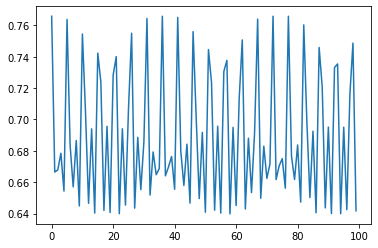

In [8]:
import matplotlib.pyplot as plt
plt.plot(fid_raw)
plt.show()

In [117]:
importlib.reload(nmrfuncs)
gateTime_1q = .03  # in \mu s 
gateTime_2q = .06  # in \mu s

gateCount, expTime, gateCount1q, gateCount2q = nmrfuncs.ZULF_circuitStats(t_ind_List, path, nmr_reg, weights, gateTime_1q, gateTime_2q)
print(np.mean(gateCount2q))
print(np.mean(gateCount1q))
print(np.mean(gateCount))
print(np.mean(expTime))

24.79638671875
57.31494140625
135.109375
3.2072314453125


In [106]:
integerList, vectorList = nmrfuncs.basisStates(num_qubits)

for ind, bint in enumerate(integerList):
    print(bint)
    benc = format(2**num_qubits - 1 - bint, '0{:d}b'.format(num_qubits))

    circuit = cirq.Circuit()
    for i in range(num_qubits):
        circuit.append(cirq.WaitGate(cirq.Duration(nanos=10**6)).on(nmr_reg[i]))
        if benc[i] == '1':
            circuit.append([cirq.rx(np.pi).on(nmr_reg[i])])
    print(np.abs(circuit.final_state_vector())**2)


15
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
13
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
importlib.reload(nmrfuncs)
path = "evolution_circuits/rotenone/"
clusterList = ['c3a', 'c5a', 'c5b', 'c1a']
NsList = [3, 5, 5, 9]
# npoints = 512
npoints = 100
t_ind_List = [i for i in range(npoints)]

fid_raw_List = []
for indc, cluster in enumerate(clusterList):
    start = timer()
    num_qubits = NsList[indc]
    nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
    fid_raw = nmrfuncs.COSY_noiselessSim(t_ind_List, path + cluster + '/', nmr_reg)
    fid_raw_List.append(fid_raw)
    savemat(spinach_datapath + 'fidraw_rotenone_cosy_qalg_npoints_{:d}_syn_'.format(npoints) + cluster + '.mat', {'fid_raw_qalg': fid_raw}, oned_as='column')
    print(cluster, 'Time: {0}'.format(timer()-start))
fid_raw_tot = np.sum(np.array(fid_raw_List), axis=0)
savemat(spinach_datapath + 'fidraw_rotenone_cosy_qalg_npoints_{:d}_syn.mat'.format(npoints), {'fid_raw_qalg': fid_raw_tot}, oned_as='column')

In [ ]:
# from quspin.operators import hamiltonian
# from quspin.basis import spin_basis_1d

# def SzTot_weighted_obs(Nspin, weights):
#     spinBasis = spin_basis_1d(Nspin, pauli=False)
#     ham_Rz = hamiltonian([["z", [[weights[i], i] for i in np.arange(Nspin)]]], [], basis=spinBasis, dtype=np.float64, check_symm=False, check_herm=False) 
#     return np.diag(ham_Rz.todense())

# gamma_1H = 2.6752 * 1e8; gamma_13C = 0.6728 * 1e8
# weights = np.array([gamma_1H, gamma_1H, gamma_1H, gamma_13C]) / gamma_1H
# Sz_Tot = np.array(SzTot_weighted_obs(len(nmr_reg), weights))

# simulator = cirq.Simulator()
# repetitions = 1000
# state_prob_list = []
# for circuit in basisCircuitList:
#     vec = simulator.simulate(circuit).final_state_vector
#     avg_pop = np.abs(vec)**2
#     state_prob_list.append(avg_pop)
# SzList = np.sum(np.multiply(Sz_Tot[:, None], np.transpose(np.array(state_prob_list))), axis=0)
# print(SzList)

In [60]:
circuit = cirq.Circuit()
num_qubits = 4
nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
circuit.append(cirq.CNOT(nmr_reg[0],nmr_reg[1]))
circuit.append(cirq.rx(0.1*np.pi).on(nmr_reg[0]))
circuit.append(cirq.CNOT(nmr_reg[1],nmr_reg[2]))
circuit.append(cirq.rx(0.1*np.pi).on(nmr_reg[2]))
# circuit.append(cirq.depolarize(p=p2q,n_qubits=2).on(nmr_reg[0],nmr_reg[1]))
# circuit.append(cirq.depolarize(p=p1q,n_qubits=1).on(nmr_reg[0]))
noise_model = nmrfuncs.depolarizingNoiseModel(p1q,p2q)
new_circuit = cirq.Circuit()
for mom in circuit:
    for op in mom:
#         new_circuit.append(op)
        noisy_op = noise_model.noisy_operation(op)
        new_circuit.append(noisy_op)
print(new_circuit)


0: ───@───D(0.04)───Rx(0.1π)───D(0.005)─────────────────────────
      │   │
1: ───X───#2────────@──────────D(0.04)──────────────────────────
                    │          │
2: ─────────────────X──────────#2─────────Rx(0.1π)───D(0.005)───


In [16]:
gateTime_1q = .039  # in ms 
gateTime_2q = .23  # in ms

gateCount, expTime, gateCount1q, gateCount2q = nmrfuncs.ZULF_circuitStats_ion(t_ind_List.astype(float), path, nmr_reg, weights, gateTime_1q, gateTime_2q)
gateCount2q_int = np.array(gateCount2q).astype(int)
print(gateCount2q_int)
np.savetxt('/Users/kis/Downloads/gateCount2q_acetonitrile_zf', gateCount2q_int, fmt='%d')

[ 0 18 36 ... 24 36 30]


In [24]:
from cirq.contrib import circuit_to_latex_using_qcircuit


t_ind = 51

qubit_reg = [cirq.LineQubit(int(i)) for i in range(4)]
path = "evolution_circuits/acetonitrile/zf_ion/"
filename = path + 'U_t_{:d}.pickle'.format(int(t_ind))
evolution_circuit = nmrfuncs.load_circuit(filename)
evo_qubits = [cirq.NamedQubit('q_{:d}'.format(i)) for i in range(len(qubit_reg))]
sorted_evo_qubits = sorted(evo_qubits, key=lambda x: x.name, reverse=False)
qmap = dict(zip(sorted_evo_qubits, qubit_reg[0:len(evo_qubits)])) 
mapped_evolution_circuit = evolution_circuit.transform_qubits(lambda q: qmap[q])

print(len(mapped_evolution_circuit)/7)
print(mapped_evolution_circuit[0:9])
print(mapped_evolution_circuit[9:17])
print(mapped_evolution_circuit[17:26])
print(mapped_evolution_circuit[26:35])
print(mapped_evolution_circuit[35::])


circuitSlice = mapped_evolution_circuit[0:9]
# circuitSlice = mapped_evolution_circuit[9:17]
# circuitSlice = mapped_evolution_circuit[17:26]
# circuitSlice = mapped_evolution_circuit[26:35]
# circuitSlice = mapped_evolution_circuit[35::]

circuit_diagram = circuit_to_latex_using_qcircuit(circuitSlice)

# with open('/Users/kis/Downloads/circuitDiagram.txt', 'w') as f:
#     f.write(circuit_diagram)


5.571428571428571
0: ───Rx(1.99π)────Rz(0.803π)────────────────────────────────────────────────────────────────────────────

1: ───Rx(1.09π)────Rz(0.74π)─────────────────────────────────────────────────────────────────────────────

2: ───Rx(0.253π)───Rz(0.779π)───────MS(-0.219π)───Rx(1.81π)────Rz(0.092π)───────MS(0.219π)───Rx(1.31π)───
                                    │                                           │
3: ───Rx(0.652π)───Rz(0.438π)───────MS(-0.219π)───Rx(0.789π)───Rz(0.076π)───────MS(0.219π)───Rx(1.5π)────
                                                                   ┌─────────────────────┐
0: ─────────────────────────────────────────────────────────────────MS(-0.147π)──────────────Rx(0.088π)───
                                                                    │
2: ───Rz(0.513π)───────MS(0.045π)───Rx(-0.079π)───Rz(0.293π)────────┼──────────Rx(0.896π)─────────────────
                       │                                            │
3: ───Rz(0.31π)────────MS(0.0